# Hausaufgabe 2
## Ablassung eines Stausees
<!-- Lizensiert unter (CC BY 4.0) Gert Herold, 2021 -->

Wegen Reparaturarbeiten an der Staumauer einer Talsperre soll das Wasser abgelassen werden. Der See habe ein Fassungsvermögen von $215 \cdot 10^6\,\text{m}^3$. Die Oberfläche des Stausees erstrecke sich über $10\,\text{km}^2$. Der Wasserauslass auf Grundhöhe habe einen Querschnitt von $2\,\text{m}^2$. Der Fluss selbst werde so umgeleitet, dass kein Wasser in den See nachfließen kann.

### 1) Anfangsbedingungen

**1.1) Es werde angenommen, die Form des Sees lasse sich mit einem umgedrehten [Kegel](https://de.wikipedia.org/wiki/Kegel_(Geometrie)) annähern. Wie tief ist dann der See?**

Speichern Sie das Ergebnis (in Metern) in der Variablen `h0` und geben Sie sie aus.

In [1]:
h0 = None
Volumen = 215 * (10 ** 6 ) 
Oberflache = 10 ** 7
h0 = (3 * Volumen) / Oberflache
print(h0)


64.5


In [2]:
# Hier ist ein Plausibilitäts-Test:
assert 60 < h0 < 80

Vereinfachend werde angenommen, dass die sich ausbildende Strömung sich mithilfe der [Bernoulli-Gleichung](https://de.wikipedia.org/wiki/Bernoulli-Gleichung) beschreiben lasse:

$$
\frac{u^2}{2}+\frac{p}{\rho}+g \, z = \text{const}
$$

Dabei beschreibt $u$ die Strömungsgeschwindigkeit des Fluids an einer beliebigen betrachteten Stelle, $p$ den hydrodynamischen Druck, $\rho$ die Dichte und $z$ die Höhe. $g=9{,}81\frac{\text{m}}{\text{s}^2}$ ist die Erdbeschleunigung. Werden nur die Seeoberfläche und der Ausfluss betrachtet, so kann der Druck $p$ ebenfalls als konstant angenommen werden, da er dem Umgebungsdruck entspricht. Ebenso wird die Dichte als konstant angenommen, und die obige Gleichung vereinfacht sich zu 

$$
\frac{u^2}{2}+g \, z = \text{const}
$$

bzw. für oben und unten:

$$
\frac{u_\text{oben}^2}{2}+g \, z_\text{oben} = \frac{u_\text{unten}^2}{2}+g \, z_\text{unten}
$$

**1.2) Berechnen Sie die sich anfangs ausbildende Strömungsgeschwindigkeit am Ausfluss $u_\text{unten,0}$ (`u_unten0`) in m/s sowie den Volumenstrom $\dot{V_0}$ (`Vdot0`) in m³/s unter der Annahme, dass die Bewegung der Seeoberfläche vernachlässigbar ist.**

In [12]:
import math # we brauchen es um sqrt Methode zu nutzen
u_unten0 = None
Vdot0 = None
u_oben0 = 0
Rohrquerschnittsflaeche = 2 
g = 9.81 
u_unten0 = math.sqrt(2*g*h0) # die gegebene Formel wird nach der gesuchten Größe umgestellt
Vdot0 = u_unten0 * Rohrquerschnittsflaeche #Formel von dem Volumnstrom




In [13]:
# Hier sind einige Plausibilitäts-Tests:
assert u_unten0 > 30
assert Vdot0 < 80

Tipp: Um die Kreiszahl $\pi$ unter Python verwenden zu können, muss man sie entweder selbst definieren oder z.B. aus dem [NumPy-Modul](https://numpy.org/) importieren. Für ein Beispiel den folgenden Code-Abschnitt öffnen.

In [14]:
# Importiere pi aus numpy
from numpy import pi
A0 = Oberflache
# Berechne den "Radius" der Seeoberfläche
r0 = (A0/pi)**0.5
print(f'Radius: {r0/1000:.2f} km')

Radius: 1.78 km


### 2) Leerung des Sees

**2.1) Schreiben Sie eine Funktion, die die Tiefe des "Kegel"-Sees (in Metern) allgemein abhängig von der enthaltenen Wassermenge bestimmt.**

In [16]:
import math
from numpy import pi
tiefe = 0
def tiefe(V):
    ratio = r0 / h0 
    Winkel =  math.atan(ratio)# Alle größen können sich ändern aber nicht der Winkel# Alle größen können sich ändern aber nicht der Winkel
    h =  ((3 * V)/(pi * (math.tan(Winkel) ** 2))) ** (1/3)#erstmal das Radius umstellen und danach muss in der Formel vom Volumen bestimmt werden , sodass nur h unbekannt wird 
    #und somit nach h umstellen , da V vorgegeben ist
    return h
    

In [17]:
# Hier sind einige Plausibilitäts-Tests:
assert abs(h0-tiefe(215e6)) < 1e-5
assert abs(50-tiefe(1e8)) < 0.1

**2.2) Schreiben Sie eine Funktion, die den diskreten Zeitverlauf der Wassertiefe $h(t)$ bis zur Leerung des Sees zurückgibt.**

  * Die Funktion soll ein Startvolumen $V_0$ und eine Zeitschrittweite $\Delta t$ übergeben bekommen.
  * Verwenden Sie in den Berechnungen standardmäßig [SI-Einheiten](https://de.wikipedia.org/wiki/Internationales_Einheitensystem).
  * Beachten Sie, dass sich auch der Volumenstrom zeitlich ändert.
  * Die Funktion soll alle berechneten Zeiten und die jeweils zugehörigen Tiefen in zwei getrennten Listen zurückgeben.
  
Hinweis: Die Änderung des Volumens lässt sich annähernd über $V_{n+1}=V_n-\dot{V_n} \cdot \Delta t$ beschreiben.

In [29]:
def abfluss(V0, dt):
    Zeiten = [] # Liste , die alle Zeiten enthält 
    Tiefen = [] # Liste , die die Veränderungen der Tiefen im Laufe der Zeit enthält 
    g = 9.81
    zeit = 0 
    V0 = Volumen
    while(V0 > 0) : # Whle Schleife , die läuft solange das Volumen größer null ist
        Zeiten.append(zeit)
        Tiefen.append(tiefe(V0))
        u_unten0 = math.sqrt(2*g*tiefe(V0))
        Vdot0 = u_unten0 * 2
        V0 -=  Vdot0 * dt # Das hier das neue Volumen , womit wird die nächste Tiefe berechnen werden 
        zeit += dt # die Zeiteinheit wird jedesmal inkrementiert um den gegebenen Wert
    return Zeiten , Tiefen

In [30]:
# Hier sind einige Plausibilitäts-Tests:
assert len(abfluss(10,1))==2
assert type(abfluss(10,1)[0])==type(abfluss(10,1)[1])==list

**2.3) Wie lange dauert es, bis der Stausee komplett abgelassen wurde?** 

Plotten Sie den Zeitverlauf der Wassertiefe bis zur Leerung für zwei Zeitschrittweiten:
  * $\Delta t_1$ = 1 Minute
  * $\Delta t_2$ = 4 Tage

**Diskutieren Sie Auffälligkeiten.**

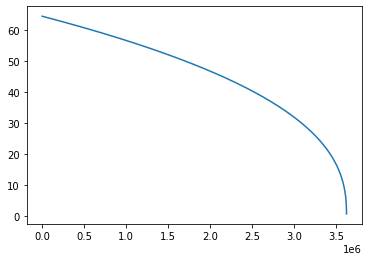

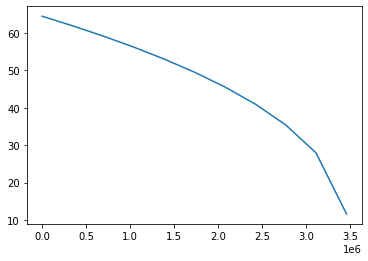

In [31]:
%matplotlib inline
from matplotlib.pyplot import plot, show
# Plotbefehl: plot(x_werte_liste, y_werte_liste)
delta_1 = 60
delta_2 = 4 * 24 * 60 * 60
Volumen = 215 * (10 ** 6)  
plot(abfluss(Volumen,delta_1)[0],abfluss(Volumen,delta_1)[1])
show()
plot(abfluss(Volumen,delta_2)[0],abfluss(Volumen,delta_2)[1]) #Graph endet hier etwas früher und bekommt einen Knick, da der See sich vor Ablauf der 4 Tage entleert
show()


### 3) Anderer See

Wiederholen Sie Aufgabenteil 2.3) unter der Annahme, dass der See bei gleichem Volumen und gleicher Oberfläche annähernd durch einen *Zylinder* beschrieben wird. Schreiben Sie hierfür möglichst wenig neuen Code.

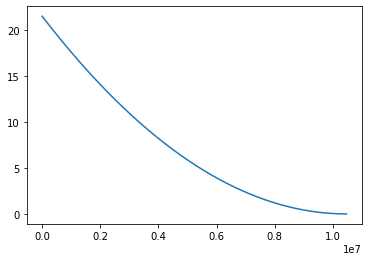

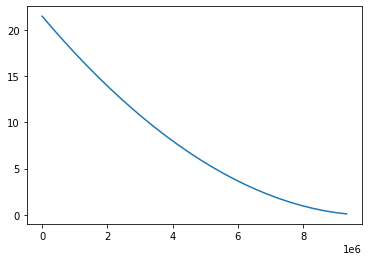

In [32]:
def tiefe_Zylinder(V):
    h = V / Oberflache # Anders als beim Kegel hier bleibt die Oberfläche fest. V = h * Oberfläche
    return h
def abfluss_Zylinder(V0, dt):
    Zeiten = []
    Tiefen = []
    g = 9.81
    zeit = 0 
    V0 = Volumen
    while(V0 > 0) : 
        Zeiten.append(zeit)
        Tiefen.append(tiefe_Zylinder(V0))
        u_unten0 = math.sqrt(2*g*tiefe_Zylinder(V0)) # wir nutzen hier dir Tiefe methode vom Zylinder
        Vdot0 = u_unten0 * 2
        V0 -=  Vdot0 * dt 
        zeit += dt
    return Zeiten , Tiefen

plot(abfluss_Zylinder(Volumen,delta_1)[0],abfluss_Zylinder(Volumen,delta_1)[1])
show()
plot(abfluss_Zylinder(Volumen,delta_2)[0],abfluss_Zylinder(Volumen,delta_2)[1])
show()



